# Project: Investigate a Dataset (noshow appointments dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from abou 110k medical appointments in Brazil and focuses on finding out what affects the attendence rate for medical appointments.
A number of characteristics about the patient are included in each row.

* Gender: Male or Female . 
* Age: How old is the patient.
* Scholarship: (1) enrolled in Brasilian welfare program, (0) not enrolled.
* Hypertension: (1) suffers hypertension, (0) doesn't suffer from hypertension
* Diabetes: (1) diabetic, (0) not diabetic
* Alcoholism: (1) alcoholic, (0) not alcoholic
* Handicap: (1 or higher) suffers one or more handicaps, (0) doesn't have handicaps
* SMS_received: (1) message sent to the patient, (0) patient didn't receive sms.
* No-show: "No" attended the appointment, "Yes" missed the appointment.



## research Questions:
* How many patients attended their appointments?
* How many of our patients with scholarship and how many missed their appointments?
* How many of our patients received sms and how many missed their appointments?
* How many of our patients are handicaped ?
* How does the number of handicaps effect our patient's attendance rate ?
* How many of our patients are alcoholic ?
* How many of our patients are diabetic ?
* How many of our patients suffer hypertension ?
* Where do our patients live and how many of them show up ? 
* What is the age distribution of patients who show up for their appointments ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties and assessing

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data cleaning

Issue 1: typos in column's names, lets replace these column's names with proper ones.

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#fixing data from typos
df.rename(columns = { 'Hipertension' : 'Hypertension',
                      'Handcap' : 'Handicap',
                      'No-show':'No_show'}, inplace = True)

In [4]:
#Printing descriptive statisics to show outliers and help understand the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Issue 2: minimum age is equal to -1, while maximum age is equal to 115.

These are outliers which we need to study more about to determine how to handle them.

But first lets look for any missing data or duplicates

In [5]:
#scanning data for missing values
print("Scanning for missing data\n---------------")
print(pd.isna(df).sum());
#scanning data to check datatypes
print("\nReviewing data information\n---------------")
print(df.info())
#scanning for any duplicates
print("\nScanning for duplicates\n---------------")
print("Number of duplicates =",sum(df.duplicated()))

Scanning for missing data
---------------
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

Reviewing data information
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9  

Issue 3: AppointmentDay and ScheduledDay needs adjusting to their datatype

In [6]:
#first lets correct data types
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

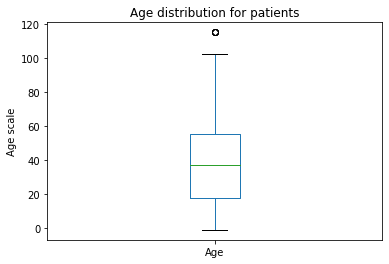

In [7]:
#then lets plot our outliers for more details
df['Age'].plot(kind = 'box');
plt.title("Age distribution for patients");
plt.ylabel('Age scale');

Looks like we have few ouliers above the 100~105 age margin, while the box plot shows continuum with ages of 0 and -1.

lets take a closer look at these ages and their data records.

In [8]:
#First lets view the data of the patients above the max range of our plot box
print(df[df["Age"] > 102].shape)
df[df["Age"] > 102]

(5, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


Only 5 records and some attended their appointments.

In [9]:
#Testing how many outliers we have
df[df["Age"] <= 0].shape

(3540, 14)

In [10]:
#Lets see how many patients with less than zero age in the records
df[df["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


The outliers we have are few compared to the overall dataset percentage, we should replace the age value for them as thats the only parameter that might needs adjusting.

### issues summary:
* column's names typos like (Hipertension, Handcap)
* Age outliers with 0 or below and above 102 years
* handicap is based on how many handicaps a patient have with ranges from 1 to 4 unlike the rest diseases
* AppointmentDay and ScheduledDay columns are not datetime format

Let's fix the age outliers by replacing them using mean age

In [11]:
#taking the mean age value and using it to replace our age outliers
mean_age = df['Age'].mean()
df['Age'] = df['Age'].replace([-1,0,115],mean_age)

In [12]:
#checking if our replacing method resulted in any issues
print("Number of duplicates =",sum(df.duplicated()))
#Printing descriptive statisics to show how our data looks now
df.describe()

Number of duplicates = 0


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,38.273255,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,22.098538,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Replacing the outliers doesn't seems to have impacted our data as the standard deviation and our mean age values didn't drastically change.

let's prepare variables to use for plotting our data based on who attended their appointment and who missed it

In [13]:
#lets prepare data for graphing by dividing our data based on show and noshow
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

handicaped = df.Handicap <= 1
not_handicaped = df.Handicap == 0


<a id='eda'></a>
## Exploratory Data Analysis


### How many patients attended their appointments?

Number of patients that attended their appointments = 88208
Number of patients that missed their appointments = 22319
Rate of attendence = 79.81


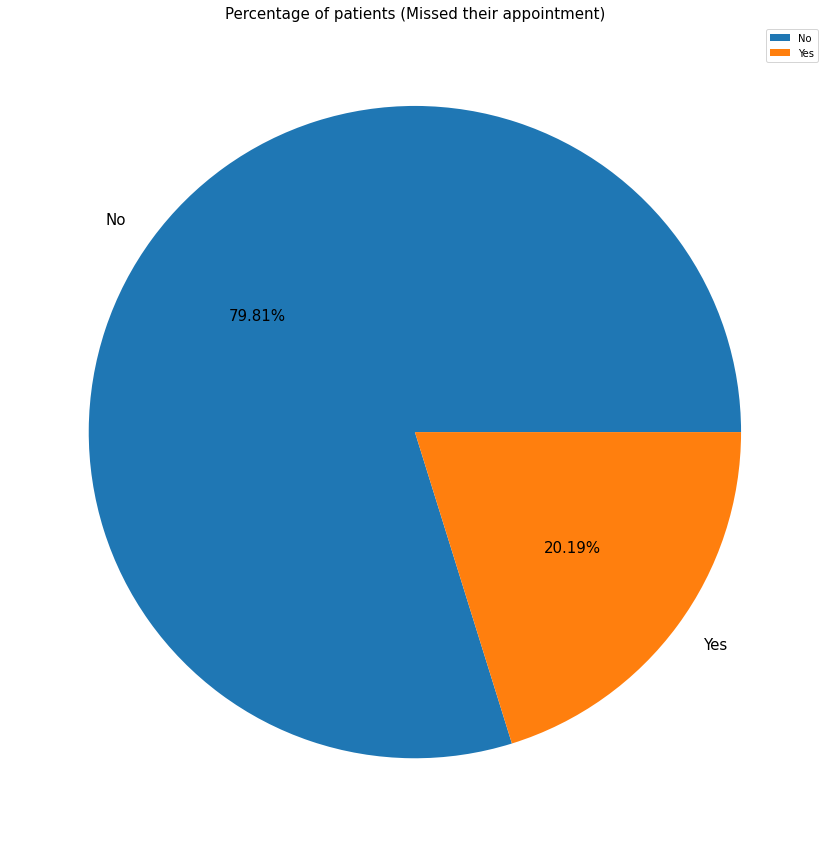

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#lets start by getting an overall percentage of patients who show up and patients who don't
count = df['No_show'].value_counts()
#then use that to make a pie plot while also printing the values
pieChart = count.plot.pie(figsize=(15,15), autopct='%.2f%%', fontsize = 15);
pieChart.set_title("Percentage of patients (Missed their appointment)", fontsize = 15);
plt.legend();
plt.ylabel("");
print('Number of patients that attended their appointments =',sum(df[df['No_show']=='No'].value_counts()));
print('Number of patients that missed their appointments =',sum(df[df['No_show']=='Yes'].value_counts()));
rate = (sum(df[df['No_show']=='No'].value_counts())/sum(count))*100
print("Rate of attendence = {:.2f}".format(rate))

Abou 20% missed their appointments, we shall try finding the relation between these patients and other factors that might have caused them to miss their appointments.

### How many of our patients with scholarship and how many missed their appointments?

The percenage of patients with scolarship = 9.83 %


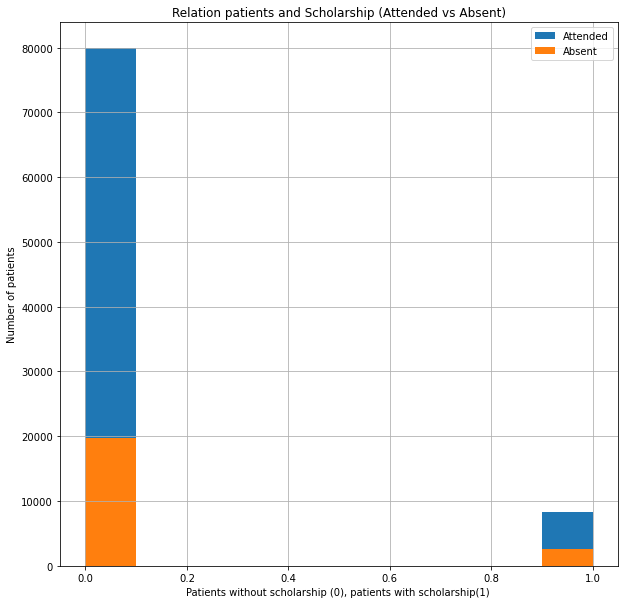

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=[10,10])
df.Scholarship[show].hist(alpha = 1, label = 'Attended', stacked=True);
df.Scholarship[noshow].hist(alpha = 1, label = 'Absent', stacked=True);
plt.legend();
plt.title("Relation patients and Scholarship (Attended vs Absent)");
plt.ylabel('Number of patients');
plt.xlabel("Patients without scholarship (0), patients with scholarship(1) ");

#Lets study the rate of people with sc
scholarship_pop = sum(df[df['Scholarship']==1].value_counts())
no_scholarship_pop = sum(df[df['Scholarship']==0].value_counts())
percentage_scholarship = (scholarship_pop/sum(count))*100
print("The percenage of patients with scolarship = {:.2f} %".format(percentage_scholarship))

In [16]:
#Lets do some more plotting and data investigating considering scholarship counts and pivot plot them
print('Patients that have Scholarship = {} '.format(scholarship_pop));
print('Patients without Scholarship = {} '.format(no_scholarship_pop));
print("\n\ndistribution between attending and absent patients with scholarship")
df.pivot_table(index=['No_show','Scholarship'], aggfunc='size')

Patients that have Scholarship = 10861 
Patients without Scholarship = 99666 


distribution between attending and absent patients with scholarship


No_show  Scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
dtype: int64

We used multiple types of plots to verify and get more insight about our data:

1- only about 10% of our patients have scholarship

2- scholarship didn't affect the overall percentage of appointment attendance

3- studying other factors is needed to conclude why such behavior happens

### How many of our patients received sms and how many missed their appointments?

The percenage of patients that received sms = 32.10 %


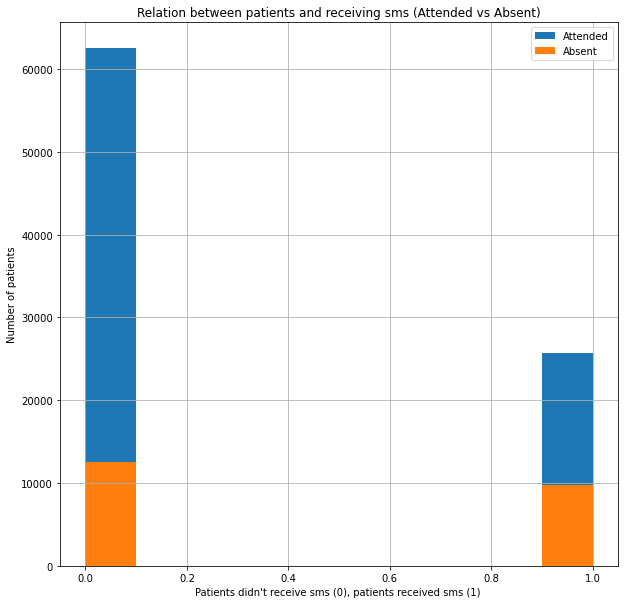

In [17]:
plt.figure(figsize=[10,10])
df.SMS_received[show].hist(alpha = 1, label = 'Attended', stacked=True);
df.SMS_received[noshow].hist(alpha = 1, label = 'Absent', stacked=True);
plt.legend();
plt.title("Relation between patients and receiving sms (Attended vs Absent)");
plt.xlabel("Patients didn\'t receive sms (0), patients received sms (1) ");
plt.ylabel('Number of patients');
received_sms = sum(df[df['SMS_received']==1].value_counts())
no_received_sms = sum(df[df['SMS_received']==0].value_counts())
percentage_received_sms = (received_sms/sum(count))*100
print("The percenage of patients that received sms = {:.2f} %".format(percentage_received_sms))

In [18]:
print('Patients that have received sms = {} '.format(received_sms));
print('Patients that didn\'t receive sms = {} '.format(no_received_sms));
print("\n\ndistribution between attending and absent patients based on sms receiving")
df.pivot_table(index=['No_show','SMS_received'], aggfunc='size')

Patients that have received sms = 35482 
Patients that didn't receive sms = 75045 


distribution between attending and absent patients based on sms receiving


No_show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
dtype: int64

This is interesting, even when a lot of patients didn't receive sms about their appointment, a huge majority attended, this makes us wonder if receiving the sms had any effect on attendance ratio, maybe it's the diseases the patients suffer that affects their attendence ratio

### How many of our patients are handicaped ?

The percenage of patients with handicaps = 2.03 %


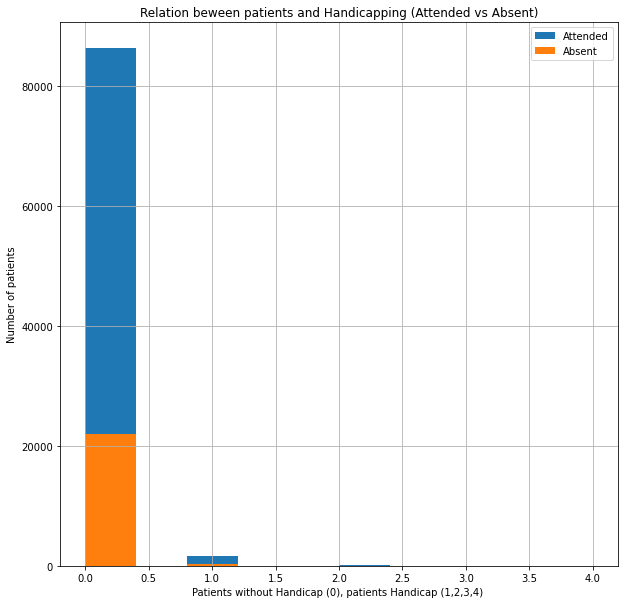

In [19]:
plt.figure(figsize=[10,10])
df.Handicap[show].hist(alpha = 1, label = 'Attended', stacked=True);
df.Handicap[noshow].hist(alpha = 1, label = 'Absent', stacked=True);
plt.legend();
plt.title("Relation beween patients and Handicapping (Attended vs Absent)");
plt.xlabel("Patients without Handicap (0), patients Handicap (1,2,3,4) ");
plt.ylabel('Number of patients');
handicap_pop = sum(df[df['Handicap']>0].value_counts())
no_handicap_pop = sum(df[df['Handicap']==0].value_counts())
percentage_handicap_pop = (handicap_pop/sum(count))*100
print("The percenage of patients with handicaps = {:.2f} %".format(percentage_handicap_pop))

### How does the number of handicaps effect our patient's attendance rate ?

In [20]:
print('Patients that have Handicaps =',sum(df[df['Handicap']>0].value_counts()));
print('Patients without Handicaps =',sum(df[df['Handicap']==0].value_counts()));
print("\n\ndistribution between attending and absent patients based on Handicaps")
df.pivot_table(index=['No_show','Handicap'], aggfunc='size')

Patients that have Handicaps = 2241
Patients without Handicaps = 108286


distribution between attending and absent patients based on Handicaps


No_show  Handicap
No       0           86374
         1            1676
         2             146
         3              10
         4               2
Yes      0           21912
         1             366
         2              37
         3               3
         4               1
dtype: int64

About 2% of our patients are handicaped, within that 2% majority still managed to show up for the appointments, this shows that handicapping have minor effect on showing up

### How many of our patients are alcoholic ?

The percenage of alcoholic patients = 3.04 %


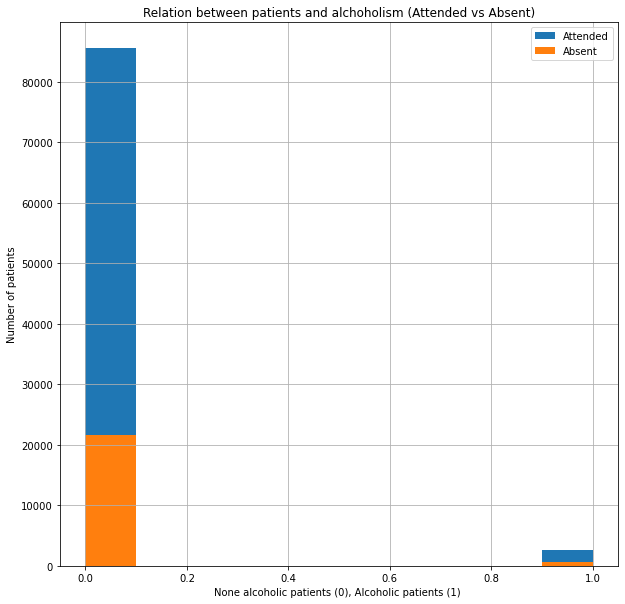

In [21]:
plt.figure(figsize=[10,10])
df.Alcoholism[show].hist(alpha = 1, label = 'Attended', stacked=True);
df.Alcoholism[noshow].hist(alpha = 1, label = 'Absent', stacked=True);
plt.legend();
plt.title("Relation between patients and alchoholism (Attended vs Absent)");
plt.xlabel("None alcoholic patients (0), Alcoholic patients (1) ");
plt.ylabel('Number of patients');
alcoholic_pop = sum(df[df['Alcoholism']==1].value_counts())
no_alcoholic_pop = sum(df[df['Alcoholism']==0].value_counts())
percentage_alcoholic_pop = (alcoholic_pop/sum(count))*100
print("The percenage of alcoholic patients = {:.2f} %".format(percentage_alcoholic_pop))

In [22]:
print('Number of alcoholic patients = {} '.format(alcoholic_pop));
print('Number of none alcoholic patients = {} '.format(no_alcoholic_pop));
print("\n\ndistribution between attending and absent patients based on alcoholism")
df.pivot_table(index=['No_show','Alcoholism'], aggfunc='size')

Number of alcoholic patients = 3360 
Number of none alcoholic patients = 107167 


distribution between attending and absent patients based on alcoholism


No_show  Alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
dtype: int64

The overall alcoholism ratio is about 3% of our total population, yet of these 3% the number of alcoholic patients that showed up is four times that of the absent patients, making alcoholism effect on attendenace a minor one

### How many of our patients are diabetic ?

The percenage of diabetic patients = 7.19 %


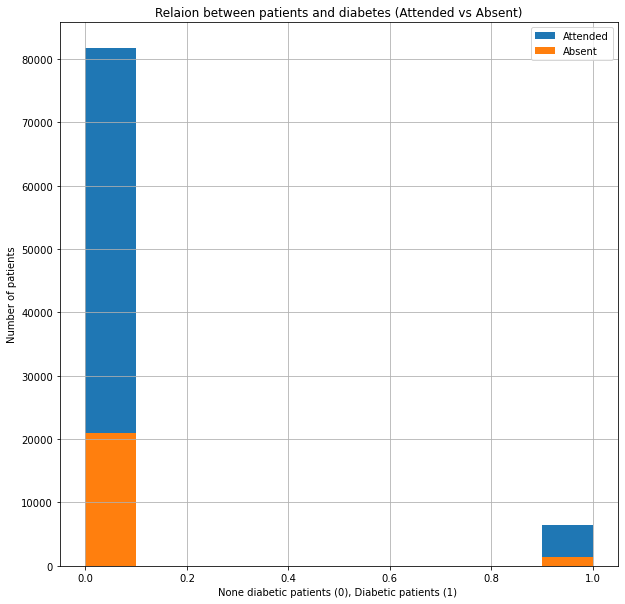

In [23]:
plt.figure(figsize=[10,10])
df.Diabetes[show].hist(alpha = 1, label = 'Attended', stacked=True);
df.Diabetes[noshow].hist(alpha = 1, label = 'Absent', stacked=True);
plt.legend();
plt.title("Relaion between patients and diabetes (Attended vs Absent)");
plt.xlabel("None diabetic patients (0), Diabetic patients (1) ");
plt.ylabel('Number of patients');
diabetic_pop = sum(df[df['Diabetes']==1].value_counts())
no_diabetic_pop = sum(df[df['Diabetes']==0].value_counts())
percentage_diabetic_pop = (diabetic_pop/sum(count))*100
print("The percenage of diabetic patients = {:.2f} %".format(percentage_diabetic_pop))

In [24]:
print('Number of diabetic patients = {}'.format(diabetic_pop));
print('Number of none diabetic patients = {}'.format(no_diabetic_pop));
print("\n\ndistribution between attending and absent patients with diabetes")
df.pivot_table(index=['No_show','Diabetes'], aggfunc='size')

Number of diabetic patients = 7943
Number of none diabetic patients = 102584


distribution between attending and absent patients with diabetes


No_show  Diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
dtype: int64

Seems that even with 7.7% of diabetic patients, about 80% of them have attended their appointments making diabetes another disease with minor effect on attendence ratio

### How many of our patients suffer hypertension ?

The percenage of patients that suffer hypertension = 19.72 %


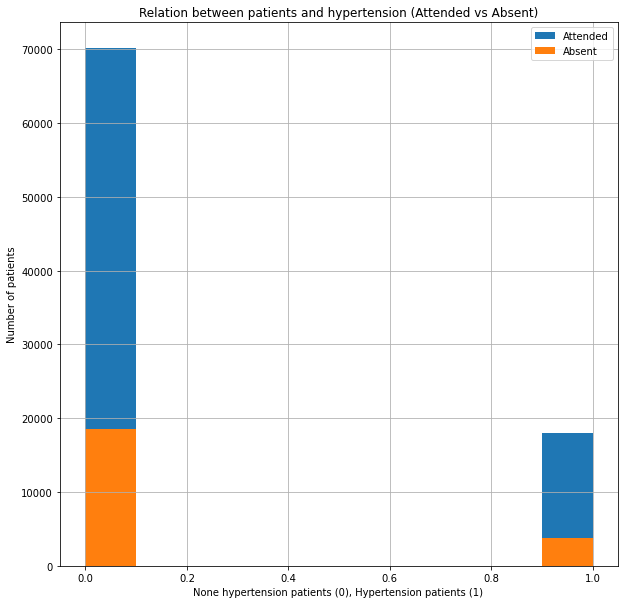

In [25]:
plt.figure(figsize=[10,10])
df.Hypertension[show].hist(alpha = 1, label = 'Attended', stacked=True);
df.Hypertension[noshow].hist(alpha = 1, label = 'Absent', stacked=True);
plt.legend();
plt.title("Relation between patients and hypertension (Attended vs Absent)");
plt.xlabel("None hypertension patients (0), Hypertension patients (1) ");
plt.ylabel('Number of patients');
hypertension_pop = sum(df[df['Hypertension']==1].value_counts())
no_hypertension_pop = sum(df[df['Hypertension']==0].value_counts())
percentage_hypertension_pop = (hypertension_pop/sum(count))*100
print("The percenage of patients that suffer hypertension = {:.2f} %".format(percentage_hypertension_pop))

In [26]:
print('Patients that suffer hypertension = {}'.format(hypertension_pop));
print('None hypertension patients = {}'.format(no_hypertension_pop));
print("\n\ndistribution between attending and absent patients based hypertension")
df.pivot_table(index=['No_show','Hypertension'], aggfunc='size')

Patients that suffer hypertension = 21801
None hypertension patients = 88726


distribution between attending and absent patients based hypertension


No_show  Hypertension
No       0               70179
         1               18029
Yes      0               18547
         1                3772
dtype: int64

patients most suffered disease seems to be hypertension with about 19.7%, but even then absent patient's populaion is only 20% of the overall patients with hypertension

So far all diseases seems to have a minor base population except for hypertension with approx quarter of our patients, the most interesting fact remains that each of these diseases have about 80% of it's population showing up for their appointments which makes us wonder, what is the age distribution of patients who show up for their appointments, could there be a relation between where they live and not attending their appointment

### What is the age distribution of patients who show up for their appointments ?

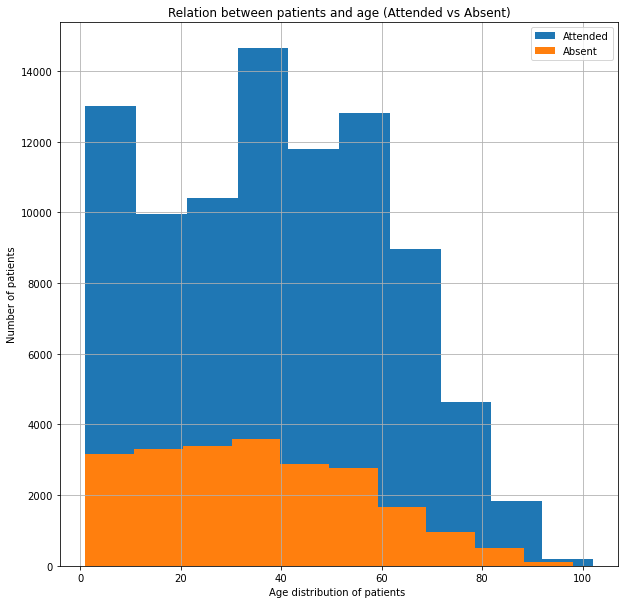

In [27]:
plt.figure(figsize=[10,10]);
df.Age[show].hist(alpha = 1, label = 'Attended', stacked=True);
df.Age[noshow].hist(alpha = 1, label = 'Absent', stacked=True);
plt.legend();
plt.title("Relation between patients and age (Attended vs Absent)");
plt.xlabel("Age distribution of patients ");
plt.ylabel('Number of patients');

This distribution shows us that the percentage of patients who show up for their appointments and the patients who don't show up is about the same for each bin, except for some regions where the rate of not showing up increases by few percentages, using bin ranges of the highest patients distribution, we can conclude that distance between the appointment location and the patients might be the cause of this phenomenon or the place where the patient resides

### Where do our patients live and how many of them show up ? 

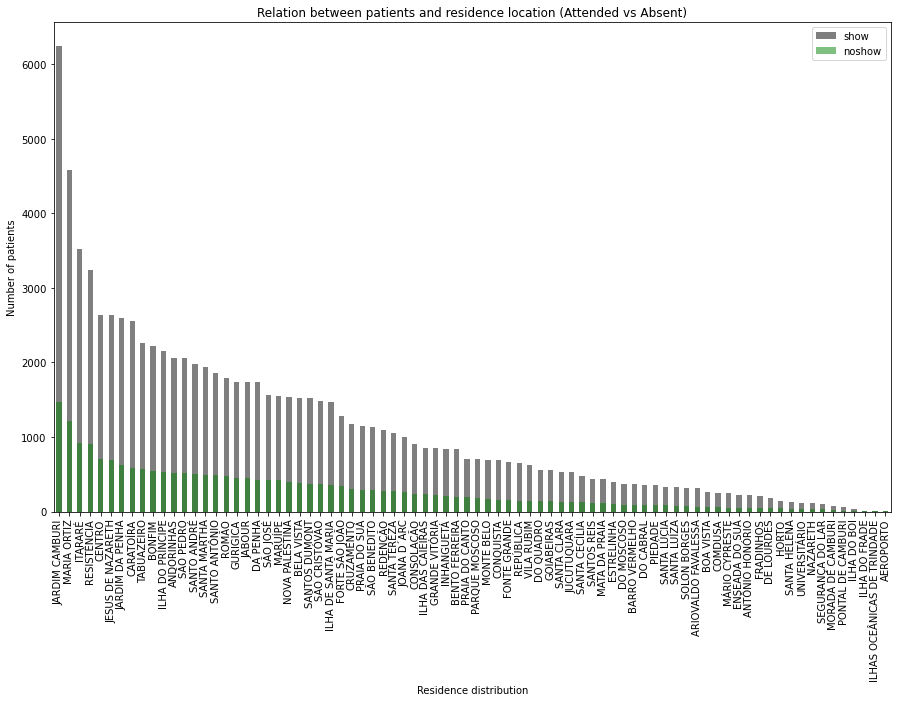

In [28]:
plt.figure(figsize=[15,9]);
df.Neighbourhood[show].value_counts().plot(kind = 'bar',color ='black',alpha = 0.5, label = 'show');
df.Neighbourhood[noshow].value_counts().plot(kind = 'bar',color ='green',alpha = 0.5, label = 'noshow');
plt.legend();
plt.title("Relation between patients and residence location (Attended vs Absent)");
plt.xlabel("Residence distribution");
plt.ylabel('Number of patients');

Seems that the same phenomenon we noticed with age distribution is also happening with residence distribution, about 20% of the total population of each residence area doesn't show up for their appointment, this calls for the need to invesigate how far is each patient from their appointment location, are there enough transportation means for the patients in these areas, would having more scholarships help with patients attendence rate ?

<a id='conclusions'></a>
## Conclusions

* About 80% of our patients showed up for their appointments
* It appears that sending reminders to the patients have minor effect on their attendence
* When studying the effect of diseases on patients population, diseases have minor effect on attendence rate
* Notice how it's always about 20% of each case study that doesn't attend their appointment
* Age factor is not a reliable source as the presence of a dense population of outliers makes certain age ranges of less credibility
* There might be a strong relation between how far does the patient resides from the hospital and the attendence rate based on how the residence distribution by patients who show up and who don't in each area yeild abou 20% of absence rate

### Limitations

* Missing features that could be useful for understanding attendence rate better such as financial and employment status
* The analysis is limited to only showing value distributions (i.e. Age, residence ... etc)
* There we some illogical data such as patients with age 0 and below, this makes age factor lose some credibiity